# KNN Model

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)
# print (df.shape)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
print(df['cp'].value_counts())
print(df['caa'].value_counts())
print(df['output'].value_counts())
# df['restecg'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
output
1    165
0    138
Name: count, dtype: int64


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
print("Missing Data: ")
print(df.isnull().sum())

Missing Data: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


array([[<Axes: title={'center': 'restecg'}>]], dtype=object)

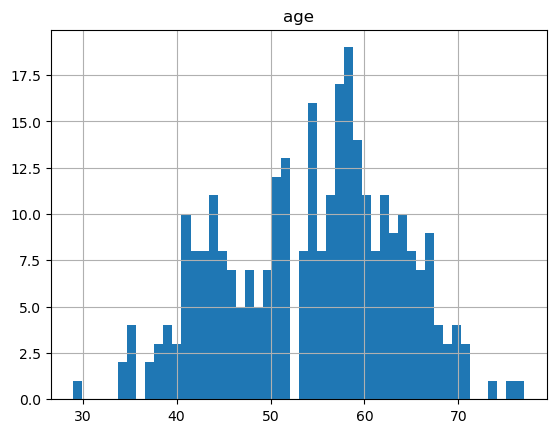

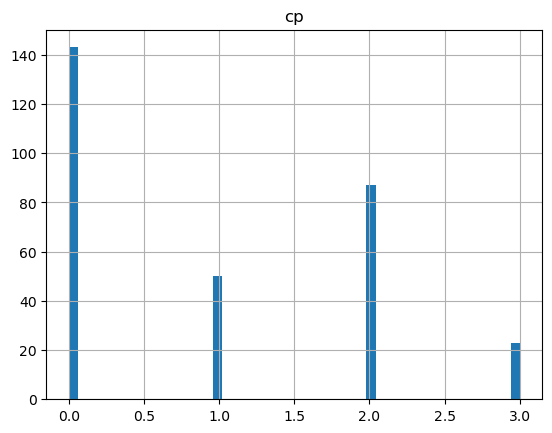

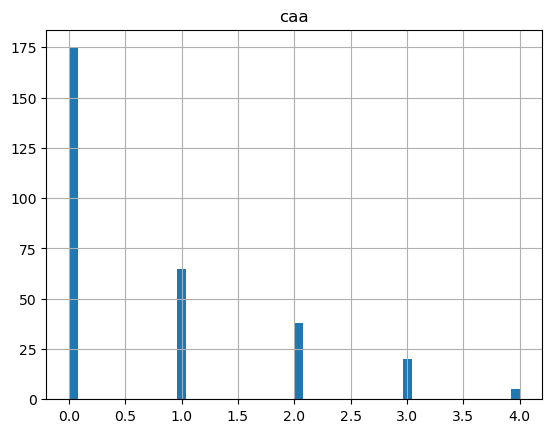

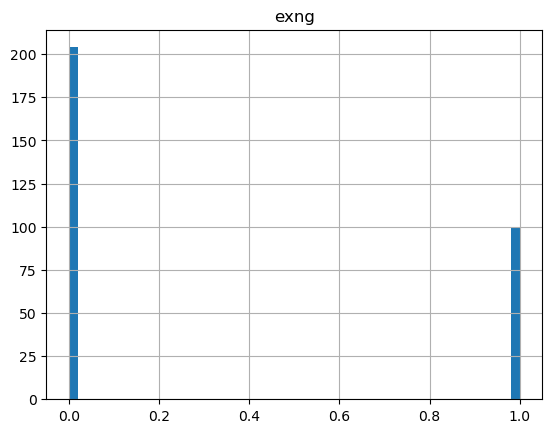

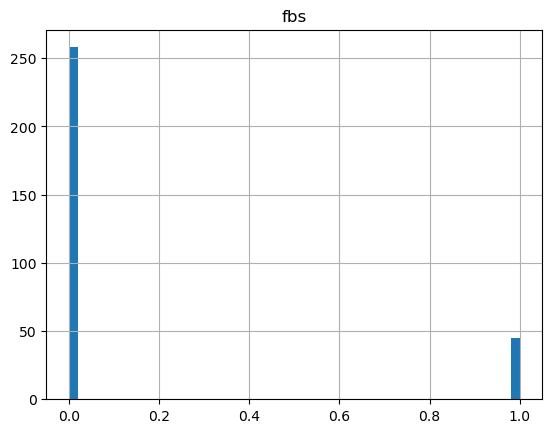

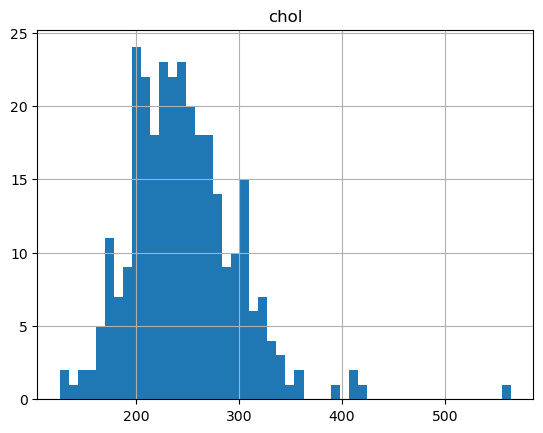

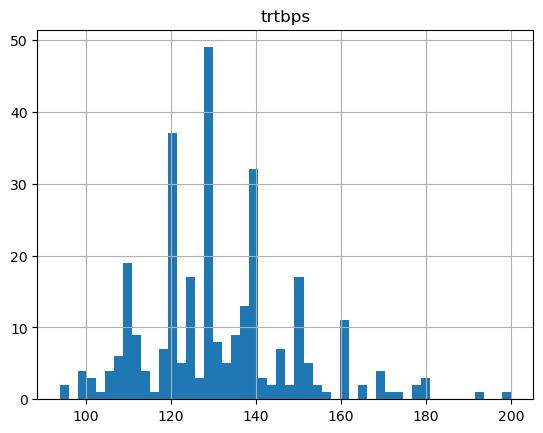

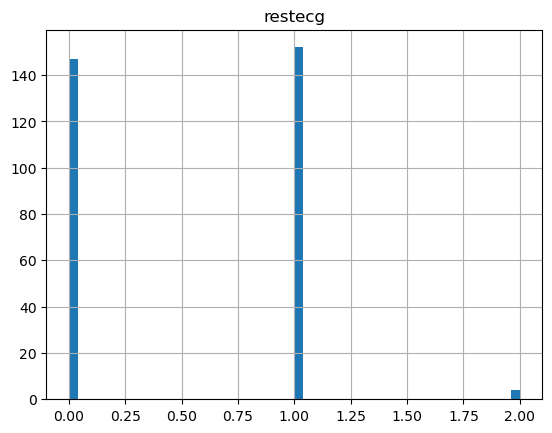

In [6]:
df.hist(column='age', bins=50)
df.hist(column='cp', bins=50)
df.hist(column='caa', bins=50)
df.hist(column='exng', bins=50)
df.hist(column='fbs', bins=50)
df.hist(column='chol', bins=50)
df.hist(column='trtbps', bins=50)
df.hist(column='restecg', bins=50)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [10]:
y = df[['output']].values
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [11]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print(X[0:10])

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 -0.09273778 -0.81677269 -0.41763453
  -1.00583187  0.97751389 -0.69663055  0.31091206  0.97635214 -0.71442887
  -0.51292188]
 [ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.19835726 -0.41763453
   0.89896224  1.23989692 -0.69663055 -0.20670527  0.97635214 -0.71442887
  -0.51292188]
 [ 0.29046364 -1.46841752 -0.93851463 -0.66386682  2.08204965 -0.41763453
   0.89896224  0.58393935  1.43548113 -0.37924438  0.97635214 -0.71442887
  -0.51292188]
 [ 0.29046364  0.68100522 -0.93851463  0.47839125 -1.04867848 -0.41763453
   0.89896224 -0.07201822 -0.69663055 -0.55178349 -0.64911323 -0.71442887
  -2.14887271]
 [ 0.18017482 -1.4684175

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (242, 13) (242, 1)
Test set: (61, 13) (61, 1)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [54]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [55]:
yhat = neigh.predict(X_test)
print(yhat[0:5])

[0 0 1 1 0]


In [56]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.871900826446281
Test set Accuracy:  0.8032786885245902


In [57]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869,
       0.81967213, 0.83606557, 0.81967213, 0.81967213])

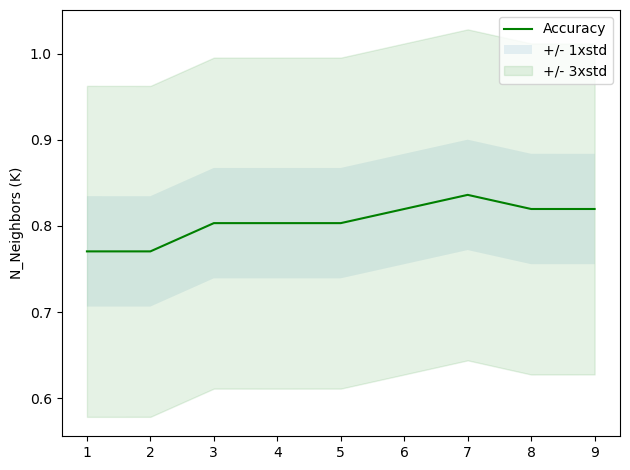

In [58]:
plt.plot(range(1,Ks),mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc -1 * std_acc, mean_acc +1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc -3 * std_acc, mean_acc +3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.ylabel('N_Neighbors (K)')
plt.tight_layout()
plt.show()

In [59]:
print('The best accuracy was with', mean_acc.max(), 'with k = ', mean_acc.argmax()+1)

The best accuracy was with 0.8360655737704918 with k =  7


# SVM Model 

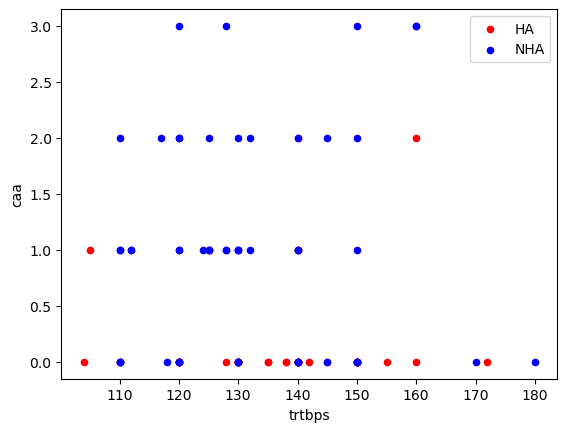

In [105]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='trtbps', y='caa', color='red', label='HA');
df[df['output'] == 0][0:50].plot(kind='scatter', x='trtbps', y='caa', color='blue', label='NHA', ax=ax);
plt.show()

In [106]:
feature_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
X = np.asanyarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [107]:
y = np.asanyarray(df['output'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set: ', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set:  (242, 13) (242,)
Test set:  (61, 13) (61,)


In [109]:
from sklearn import svm
# Kernel default is rbf
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [110]:
yhat = clf.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [112]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    accuracy                           0.67        61
   macro avg       0.67      0.63      0.63        61
weighted avg       0.67      0.67      0.65        61

Confusion matrix, without normalization
[[10 15]
 [ 5 31]]


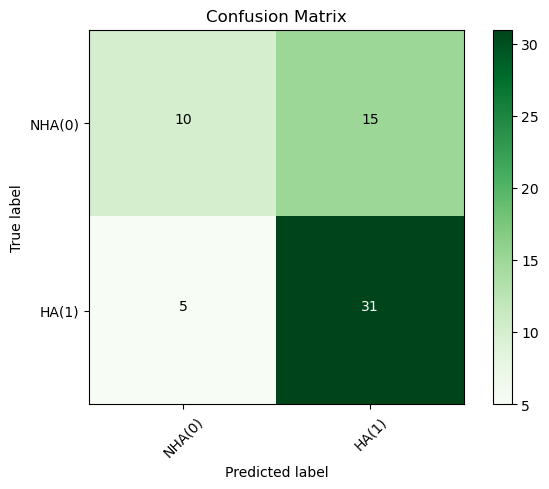

In [113]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NHA(0)', 'HA(1)'], normalize= False, title='Confusion Matrix')

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.6511395441823271

In [115]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.6078431372549019

In [116]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
yhat_linear = clf_linear.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_linear, average='weighted'))
print("Jaccard Score: %.4f" % jaccard_score(y_test, yhat_linear, pos_label=1))

Avg F1-score: 0.9178
Jaccard Score: 0.8718


In [117]:
# clf_poly = svm.SVC(kernel='poly')
# clf_poly.fit(X_train, y_train)
# yhat_poly = clf_poly.predict(X_test)
# print("Avg F1-score: %.4f" % f1_score(y_test, yhat_poly, average='weighted'))
# print("Jaccard Score: %.4f" % jaccard_score(y_test, yhat_poly, pos_label=1))

In [118]:
# clf_sig = svm.SVC(kernel='sigmoid')
# clf_sig.fit(X_train, y_train)
# yhat_sig = clf_sig.predict(X_test)
# print("Avg F1-score: %.4f" % f1_score(y_test, yhat_sig, average='weighted'))
# print("Jaccard Score: %.4f" % jaccard_score(y_test, yhat_sig, pos_label=1))

# Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [80]:
drTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
drTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
drTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [82]:
predictionTree = drTree.predict(X_test)
print (predictionTree [0:5])
print (y_test [0:5])

[0 0 1 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]]


In [83]:
print ('DecisionTree Accuracy: ', metrics.accuracy_score(y_test, predictionTree))

DecisionTree Accuracy:  0.8524590163934426


In [46]:
!pip install pydotplus

In [84]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import os
%matplotlib inline 

In [55]:
!pip install graphviz

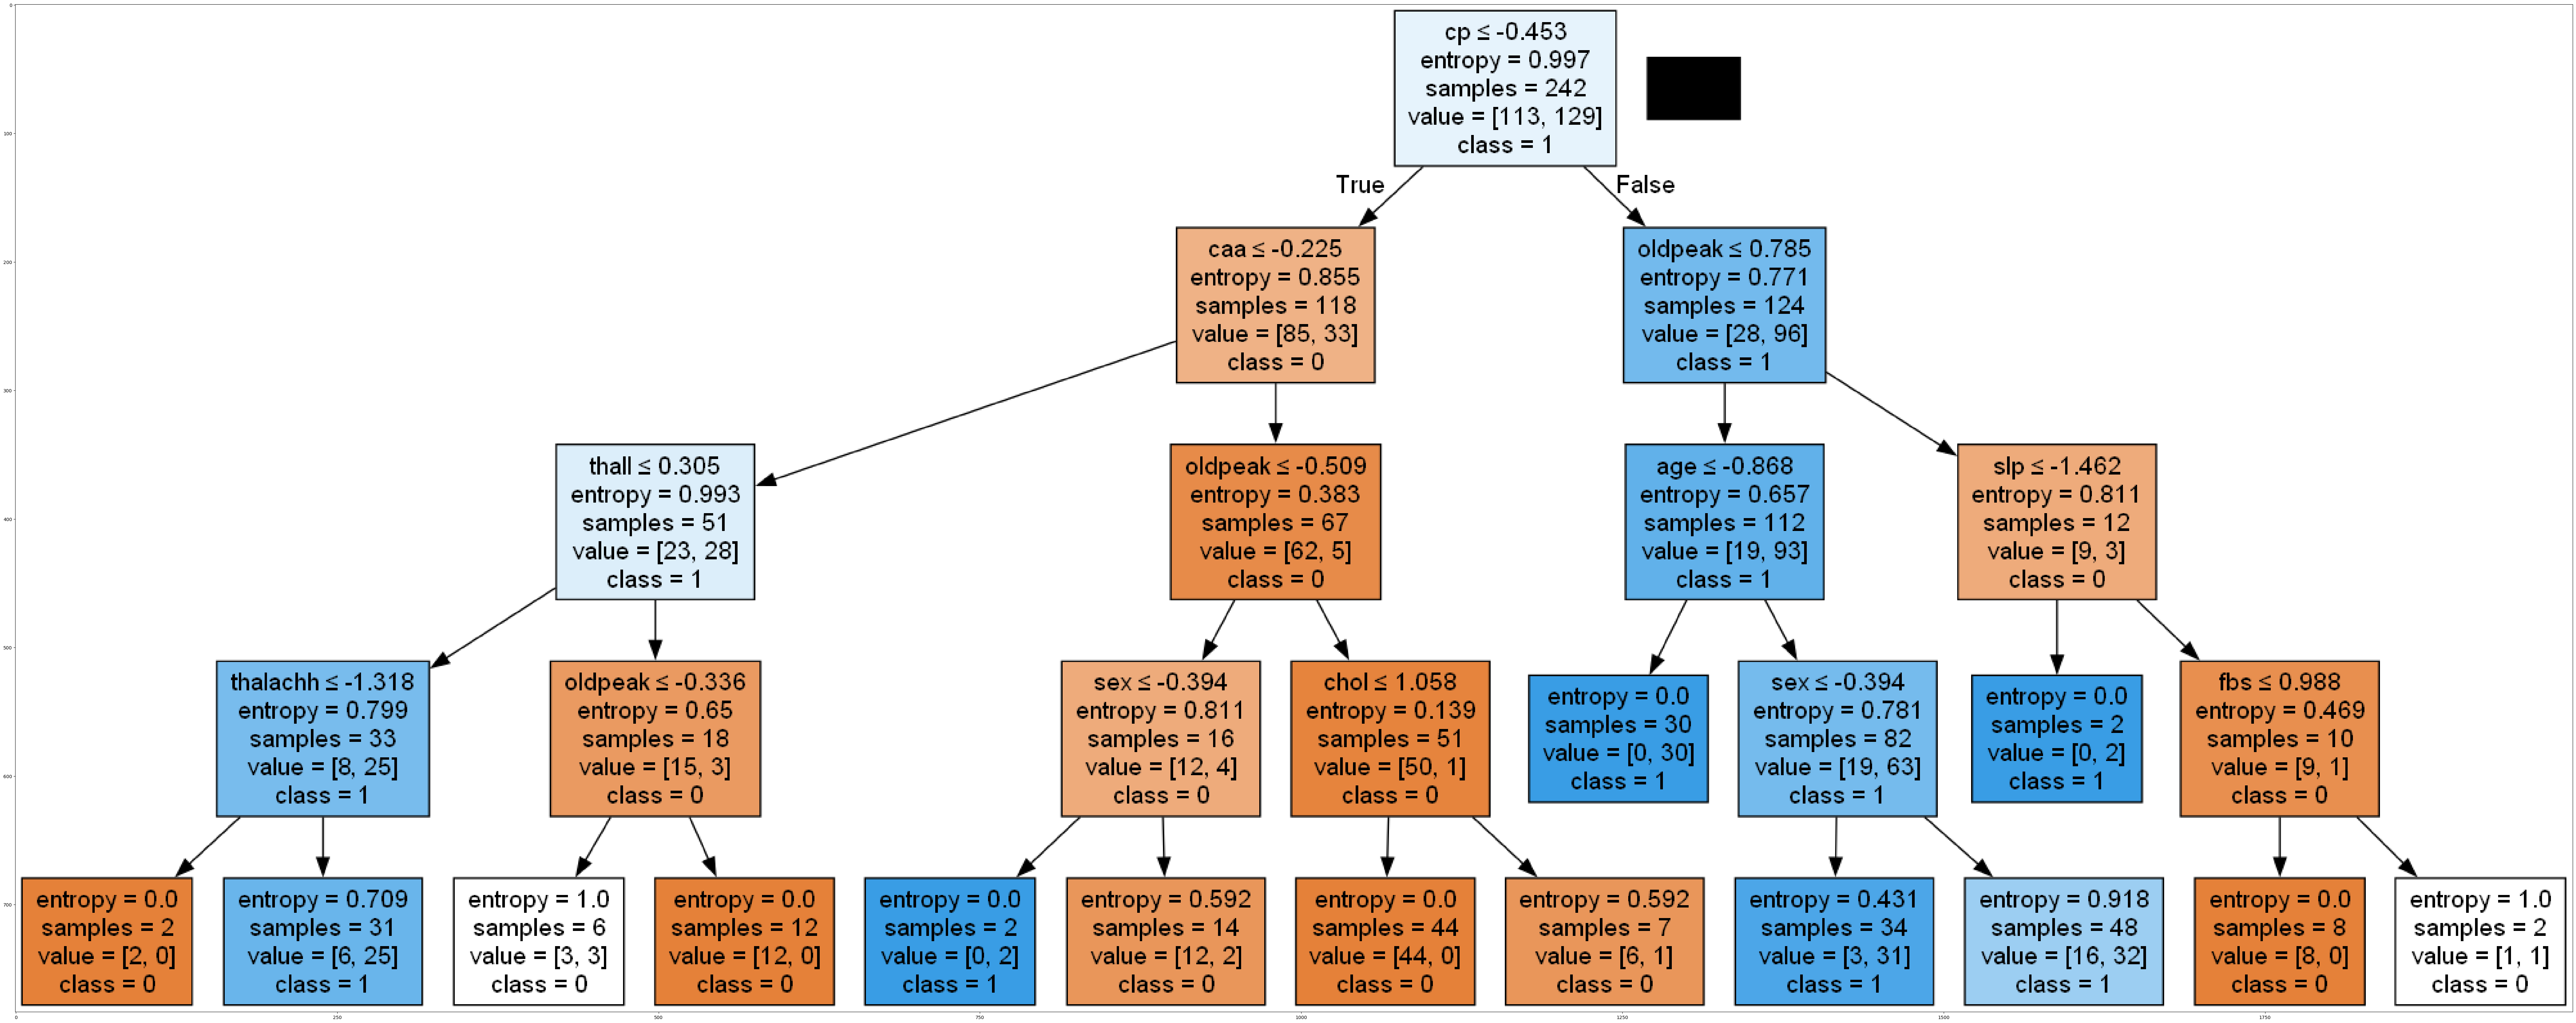

In [85]:
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\graphviz\bin'
dot_df = StringIO()
filename = "hearttree.png"
featureNames = df.columns[0:13]
class_names = [str(cls) for cls in np.unique(y_train)]
out = tree.export_graphviz(drTree, feature_names = featureNames, out_file = dot_df, class_names = class_names, filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_df.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img, interpolation='nearest')

# Logistic Model 

In [86]:
Xl = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
Xl[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [89]:
yl = np.asarray(df[['output']])
yl[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [90]:
scaler = preprocessing.StandardScaler().fit(Xl)
Xl = scaler.transform(Xl)
Xl[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [111]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.2, random_state = 4)
print ('Train set: ', Xl_train.shape, yl_train.shape)
print ('Test set: ', Xl_test.shape, yl_test.shape)

Train set:  (242, 13) (242, 1)
Test set:  (61, 13) (61, 1)


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xl_train, yl_train)
LR

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [113]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [114]:
LR_yhat_prob = LR.predict_proba(X_test)
LR_yhat_prob

array([[0.38, 0.62],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.63, 0.37],
       [0.23, 0.77],
       [0.49, 0.51],
       [0.37, 0.63],
       [0.43, 0.57],
       [0.2 , 0.8 ],
       [0.39, 0.61],
       [0.57, 0.43],
       [0.33, 0.67],
       [0.86, 0.14],
       [0.29, 0.71],
       [0.29, 0.71],
       [0.68, 0.32],
       [0.46, 0.54],
       [0.24, 0.76],
       [0.39, 0.61],
       [0.81, 0.19],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.59, 0.41],
       [0.23, 0.77],
       [0.44, 0.56],
       [0.81, 0.19],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.41, 0.59],
       [0.48, 0.52],
       [0.83, 0.17],
       [0.8 , 0.2 ],
       [0.69, 0.31],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.26, 0.74],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.53,

In [115]:
from sklearn.metrics import jaccard_score
jaccard_score(yl_test, LR_yhat, pos_label=1)

0.825

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [117]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
print(confusion_matrix(yl_test, LR_yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

Confusion matrix, without normalization
[[21  4]
 [ 3 33]]


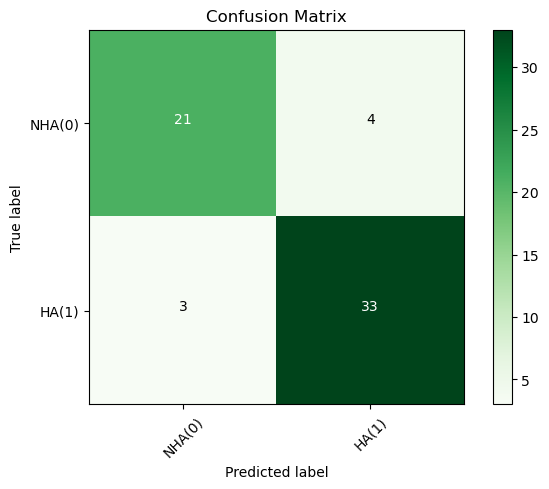

In [118]:
cnf_matrix = confusion_matrix(yl_test, LR_yhat, labels=[0, 1])
np.set_printoptions(precision=2)
print(classification_report(yl_test, LR_yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NHA(0)', 'HA(1)'], normalize= False, title='Confusion Matrix')

In [119]:
from sklearn.metrics import log_loss
log_loss(yl_test, LR_yhat_prob)

0.4363789674264379

In [120]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(Xl_train, yl_train)
LR2

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='sag')

In [121]:
LR2_yhat_prob = LR2.predict_proba(X_test)
LR2_yhat_prob

array([[0.35, 0.65],
       [0.7 , 0.3 ],
       [0.38, 0.62],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.48, 0.52],
       [0.61, 0.39],
       [0.22, 0.78],
       [0.47, 0.53],
       [0.34, 0.66],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.37, 0.63],
       [0.54, 0.46],
       [0.31, 0.69],
       [0.85, 0.15],
       [0.27, 0.73],
       [0.27, 0.73],
       [0.66, 0.34],
       [0.43, 0.57],
       [0.22, 0.78],
       [0.37, 0.63],
       [0.79, 0.21],
       [0.44, 0.56],
       [0.43, 0.57],
       [0.73, 0.27],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.41, 0.59],
       [0.79, 0.21],
       [0.56, 0.44],
       [0.48, 0.52],
       [0.17, 0.83],
       [0.34, 0.66],
       [0.41, 0.59],
       [0.23, 0.77],
       [0.23, 0.77],
       [0.38, 0.62],
       [0.46, 0.54],
       [0.82, 0.18],
       [0.78, 0.22],
       [0.67, 0.33],
       [0.7 , 0.3 ],
       [0.38, 0.62],
       [0.24, 0.76],
       [0.38, 0.62],
       [0.72, 0.28],
       [0.5 ,

In [122]:
print ("LogLoss: : %.2f" % log_loss(yl_test, LR2_yhat_prob))

LogLoss: : 0.43
